# Hand-Written Digits Recognition

Automated handwritten digit recognition is widely used today-from recognizing zip codes on mail envelopes to recognizing amounts written on bank checks. In what follows, we implement $\bf \text{one-vs-all logistic regression}$ and $\bf \text{neural networks}$ separately to recognize hand-written digits (from 0 to 9). In this work, I mainly write codes in $\bf \text{MATLAB/Octave}$.

## 1. Dataset

A data set contains 5000 training examples of hand-written digits. Each training example is 20 pixel by 20 pixel grayscale image of the digit. Each pixel is represented by a floating point number indicating the grayscale intensity at that location. The 20 by 20 grid of pixels is "unrolled" into a 400-dimensional matrix $X$. Each of these training examples becomes a single row in our data matrix $X$. This gives us a 5000 by 400 matrix $X$ where every row is a training example for a handwritten digit image.

The second part of the training set is a 5000-dimensional vector $y$ that contains labels for the training set. 

## 2. Visualizing the Data

As usual, we begin by visualizing a subset of the training set. We select randomly 100 rows from $X$, and map each row to a 20 pixel by 20 pixel grayscale image and display the images together:

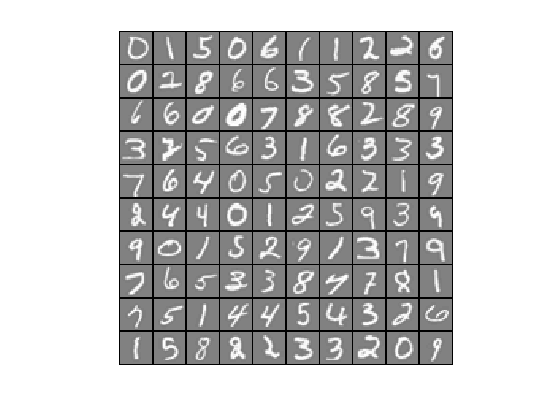

In [1]:
from IPython.display import Image
Image(filename='Figure/hand_written_digits.png')

## 3. Multiple one-vs-all Logistic Regression

First, we apply $\bf \text{multiple one-vs-all logistic regression models}$ to build a multi-calss classifier. Since there are 10 classes, we will need to train 10 separate logistic regression classifiers. To make this training efficient, it is important to ensure that our codes is well vectorized. We implement a vectorized version of logistic regression.

In the regularized logistic regression, the cost function is
\begin{equation}
J(\theta) = \frac{1}{m} \sum \left( -y^{(i)} \log (h_\theta (x^{(i)})) - (1-y^{(i)}) \log(1-h_\theta(x^{(i)})) \right) + \frac{\lambda}{2m} \sum_{j=1}^n \theta_j^2 
\end{equation}
where $h_\theta (z)$ is the sigmoid function,
\begin{equation}
 h_\theta(z) = \frac{1}{1 + e^{-z}}
\end{equation}
with $z = X \theta$.

Then the gradient is 
\begin{align}
    \frac{\partial J(\theta)}{\partial \theta_0} &= \frac{1}{m} \sum_{i=1}^m (h_\theta (x^{(i)}) - y^{(i)})x_j^{(i)} \qquad \text{for } j= 0 \\
        \frac{\partial J(\theta)}{\partial \theta_j} &= \frac{1}{m} \sum_{i=1}^m (h_\theta (x^{(i)}) - y^{(i)})x_j^{(i)} + \frac{\lambda}{m} \theta_j \qquad \text{for } j\geq 1.
\end{align}

Next, we implement one-vs-all classification by training multiple regularized logistic regression classifiers, one for each of the $K = 10$ classes in handwritten digits dataset. Note that the $y$ argument is a vector of labels from 1 to 10, where we have mapped the digit "0" to the label 10.

When training the classifier for class $k \in \{1,\ldots , K\}$, we want a $m$-dimensional vector of labels $y$, where $y_k \in 0,1$ indicates whether $i$-th training instance $y^{(i)}$ belong to class $k$ (y_k = 1), and other elements of $y^{(i)}$ are 0. Besides, we use fmincg in MATLAB/Octave to minimize the cost function.


### Results

After training our one-vs-all classifier, we can now use $\theta$ to predict the digit contained in a given image. For each input, we compute the "probability" belonging to each class using the trained logistic regression classifier. Our one-vs-all prediction function will pick the class for which the corresponding logistic regression classifier outputs the highest probability and return the class label ($1,2, \ldots,$ or $K$) as the prediction for the input examples. By using the learned value of $\theta$, we attained the training set accuracy is about 95.02 %.

## 4. Neural Networks

In the previous section, we implement multi-class logistic regression to recognize hand-written digits. However, logistic regression cannot form more complex hypothesis as it is only a linear classifier.

We will implement a neural network to recognize handwritten digits using the same training set as before. The neural network will be able to represent complext models that form non-linear hypothesis.

### 4.1 Regularized cost function

We use the cost function/error function,
\begin{equation}
J(\theta) = \frac{1}{m} \sum_{i=1}^m J_d(\theta) + \frac{\lambda}{2m} \sum_{l=1}^{L-1} \sum_{i=1}^{s_l} \sum_{j=1}^{s_{l+1}} (\Theta_{j,i}^{(l)})^2,
\end{equation}
where $J_d(\theta)$ is defined as
\begin{equation}
J_d(\theta) = \sum_{k=1}^K \left( -y_k^{(i)} \log(a_k^{(l)}) - (1-y_k^{(i)})\log (1-a_k^{(l)}    \right).
\end{equation}
Here $\Theta_{j,i}^{(l)}$ connects node $i$ in layer $l$ with node $j$ in layer $l+1$ for each training sample. Again, we need to minimize the cost function by so-called $\bf \text{backpropagation algorithm}$. $a^{(l)}_i$, the activation for node $i$ in layer $l$, is given by

\begin{equation}
a^{(l)} = g(z^{(l)}),
\end{equation}
where $g(z^{(l)})$ is the sigmoid function

\begin{equation}
g(z^{(l)}) = \frac{1}{1+e^{-z^{(l)}}},
\end{equation}
where $z_j^{(l)}$ at layer $l$ is given by

\begin{equation}
z_j^{(l)} = \sum_i a_i^{(l-1)} \Theta_{ji}^{(l-1)}.
\end{equation}

### 4.2 Feedforward Propagation and Backpropagation Algorithm

We only outline main steps in the following, and do not show derivations of backpropagation algorithm in detail.

By implementing the neural network, we do the following procedures: 

### 1 
Assume we use training set $\{(x^{(1)}, y^{(1)}), \ldots, (x^{(m)}, y^{(m)}) \}$. That is, we have $m$ training examples.

### 2
When training neural networks, it is important to $\bf \text{randomly initialize}$ the parameters for symmetry breaking. One effective strategy for random initialization is to randomly select values for weights $\Theta^{(l)}$ uniformly in the range $[-\epsilon_{\rm init}, \epsilon_{\rm init}]$. In out calculation, we use $\epsilon_{\rm init} = 0.12$.

### 3
Calculate the forward phase for each input-output pair $(\vec{x}^{(t)}, \vec{y}^{(t)})$ and store the results $(z^{(2)}, a^{(2)}, z^{(3)}, a^{(3)})$ for layers 2 and 3. Here we only consider one hidden layer, layer 2, and layer 3 is ouput layer. 

### 4

Calculate the backward phase for each input-output pair $(\vec{x}^{(t)}, \vec{y}^{(t)})$ and store the results and store the results $\frac{\partial J(\Theta)}{\partial \Theta_{i,j}^{(l)}} = D_{ij}^{(l)}$, where $D_{ij}^{(l)} = \frac{1}{m} \Delta_{ij}^{(l)} + \frac{\lambda}{m}\Theta_{ij}^{(l)}$ if $i\neq 0$, and $D_{ij}^{(l)} = \frac{1}{m} \Delta_{ij}^{(l)} $ if $i=0$ for each weight $\Theta_{i,j}^{(l)}$ connecting node $i$ in layer $l$ to node $j$ in layer $(l+1)$ by proceeding from output layer $L$ to input layer 1.

(a) Evaluate the error term from the final layer $\delta^{(L)}$ by
\begin{equation}
\delta_i^{(L)} = (a_i^{(L)} - y_i).
\end{equation}

(b) Backpropagate the error terms for the hidden layers $\delta^{(l)}$, working backwards from the final hidden layer $l=L-1$, by repeatedly using the equation,
\begin{equation}
\delta_i^{(l)} = \sum_k g'(z_i^{(l)}) \Theta_{i,k}^{(l)} \delta_k^{(l+1)}
\end{equation}
where $g'(z) = g(z) (1-g(z))$.

(c) Evaluate the partial derivative of $J$ with respect to $\Theta_{i,j}^{(l)}$ by using the equation,
\begin{equation}
\frac{\partial J(\Theta)}{\partial \Theta_{i,j}^{(l)}} = \frac{1}{m} \sum_m \delta_i^{(l+1)} a_j^{(l)} + \frac{\lambda}{m} \Theta_{i,j}^{(l)},
\end{equation}
where the second term does not include bias terms.

### 5

With $J(\theta)$ and $\frac{\partial J}{\partial \Theta}$ obtained in above procedure, we can use fmincg function in Octave/MATLAB, which solves an unconstrained optimization problem, to train dataset we have.   

### Results

After we successfully implemented the neural network cost function and gradient computation by backpropagation algorithm, we are ready to learn a good set parameters from training samples by using fmincg function in Octave.

After the training completes, we obtained the training set accuracy 96.2%. This is the result by using 50 iterations in minimization process and $\lambda = 1$. With same value of $\lambda$, we train the neural network for more iterations, 400, and we obtained the training set accuracy 99.44%.